### INTRADAY & TIME SERIES ANALYSIS

##### <font color="red">OPEN<font> <font color="green">HIGH<font> <font color="red">LOW<font> <font color="green">CLOSE<font> 

#### Hemant Thapa

Intraday trading refers to the practice of buying and selling financial instruments within the same trading day. This type of trading can be used to generate profits by taking advantage of short-term price movements in the market. In order to be successful in intraday trading, traders must be able to quickly analyze and interpret market data, as well as have a good understanding of technical analysis and risk management techniques.

Time series analysis is a statistical technique used to analyze data that is collected over time. It is used to identify patterns and trends in the data and to make forecasts about future values. In the context of intraday trading, time series analysis is used to analyze historical price data and to make predictions about future price movements. This information can then be used to inform trading decisions and to help manage risk.

Time series analysis can be done using a variety of techniques, including trend analysis, seasonal analysis, and regression analysis. These techniques can be used to identify key drivers of price movements, such as economic indicators and market sentiment, and to make predictions about future price movements.

##### 1. LIBRARIES

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import datetime
from typing import List
import warnings

#filter out FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### 4. CLASS STOCK DATA 

In [2]:
class StockData:
    def __init__(self, df):
        self.df = df

    def add_day_time(self):
        # Convert datetime column to separate date and hour columns
        self.df['day'] = pd.to_datetime(self.df['datetime']).dt.day
        self.df['date'] = pd.to_datetime(self.df['datetime']).dt.date
        self.df['hour'] = pd.to_datetime(self.df['datetime']).dt.hour
        self.df['time'] = pd.to_datetime(self.df['datetime']).dt.time
        self.df = self.df.drop('datetime', axis=1)

        midnight = pd.Timestamp('today').normalize()
        self.df['time_str'] = self.df['time'].apply(lambda x: x.strftime('%H:%M:%S'))
        self.df['day_time'] = self.df['date'].astype(str) + ' ' + self.df['time_str']
        
        return self.df

##### 5. TESLA DATASET

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_history = tesla.history(period="max")

##### 6. TESLA MAJOR HOLDER

In [5]:
obj1 = tesla.major_holders
obj1

,0,1
0,13.02%,% of Shares Held by All Insider
1,44.98%,% of Shares Held by Institutions
2,51.71%,% of Float Held by Institutions
3,3702,Number of Institutions Holding Shares


In [6]:
data = obj1.values.flatten()

In [7]:
result = {}
for i in range(0, len(data), 2):
    result[i//2] = {
        'value': data[i],
        'description': data[i+1]
    }

result = list(result.values())  # convert to list of dictionaries

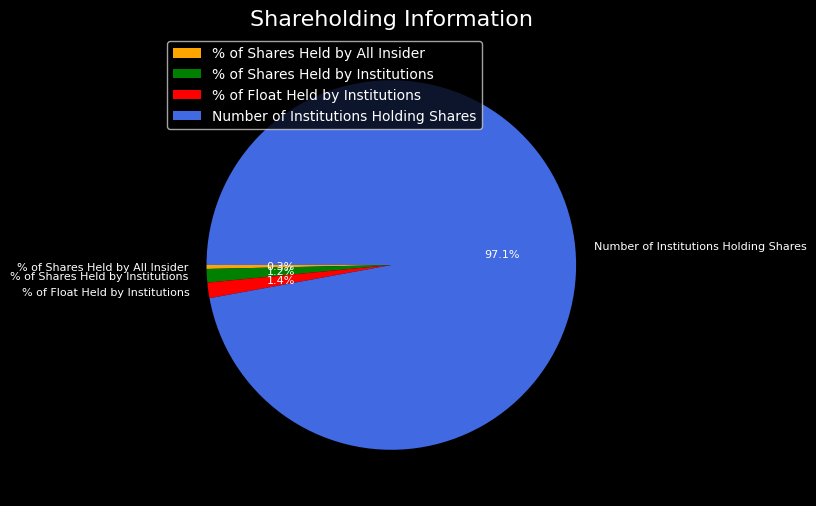

In [8]:
values = [float(d['value'].strip('%')) for d in result]
labels = [d['description'] for d in result]
colors = ['orange', 'green', 'red', 'royalblue']

plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=180, textprops={'fontsize': 8}, colors=colors)
plt.title('Shareholding Information', fontsize=16)
plt.legend(labels, loc='upper left')
plt.show()

##### 7. INSTITUTIONAL HOLDERS

In [9]:
institutional = tesla.institutional_holders
institutional

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,225940011,2023-09-29,0.0711,48335369031
1,Blackrock Inc.,186653186,2023-09-29,0.0587,39930734650
2,State Street Corporation,104861369,2023-09-29,0.0330,22433003102
3,"Geode Capital Management, LLC",53875703,2023-09-29,0.0169,11525634502
4,Capital World Investors,41103054,2023-09-29,0.0129,8793180431
5,Morgan Stanley,30160747,2023-09-29,0.0095,6452291606
6,JP Morgan Chase & Company,29419060,2023-09-29,0.0093,6293622432
7,"FMR, LLC",29040734,2023-09-29,0.0091,6212687113
8,Norges Bank Investment Management,28085245,2022-12-30,0.0088,6008279256
9,Northern Trust Corporation,27542824,2023-09-29,0.0087,5892239078


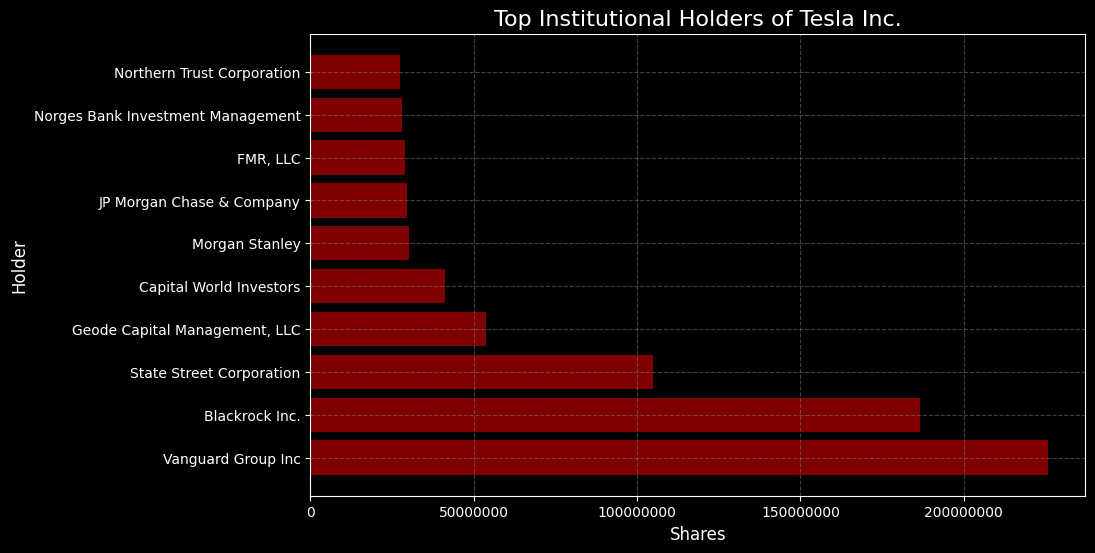

In [10]:
holders = institutional.Holder
shares = institutional.Shares
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(holders, shares, color='red', alpha=0.5)
ax.set_title('Top Institutional Holders of Tesla Inc.', fontsize=16)
ax.set_xlabel('Shares', fontsize=12)
ax.set_ylabel('Holder', fontsize=12)
plt.grid(linestyle='--', color='gray', alpha=0.5)
ax.ticklabel_format(axis='x', style='plain')
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

##### 8. TESLA ONE YEAR BAR CHART

In [11]:
price = tesla_history.tail(365)
price.shape

(365, 7)

In [12]:
price.columns
price.columns = price.columns.str.lower()

<Figure size 1500x600 with 0 Axes>

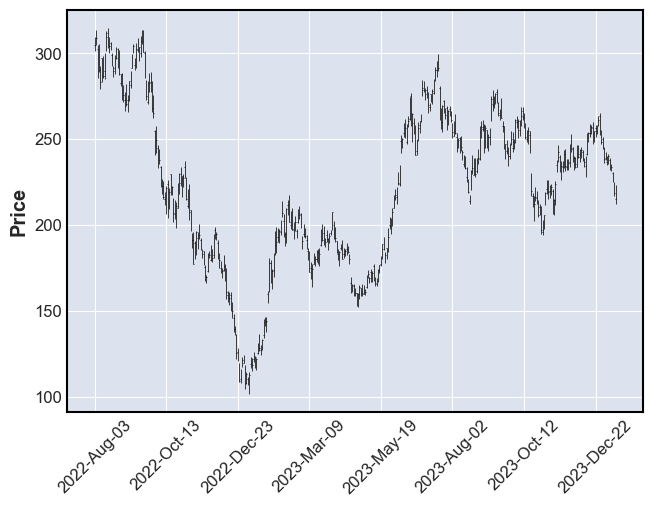

In [13]:
plt.figure(figsize=(15,6))
mpf.plot(price);

##### 9. TESLA ONE YEAR CANDLE CHART

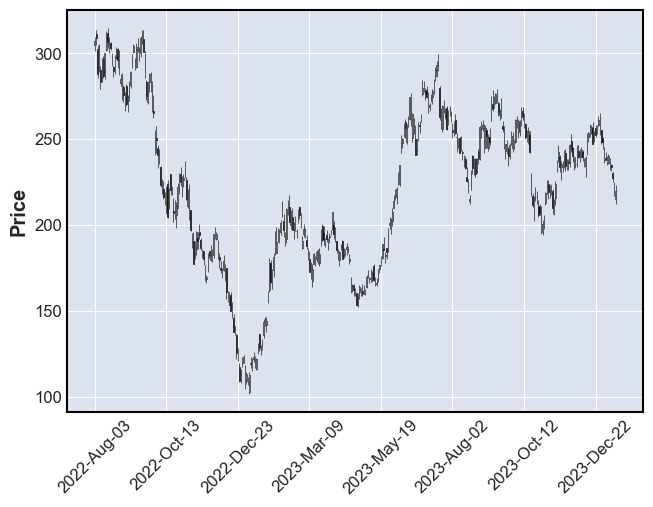

In [14]:
mpf.plot(price,type='candle')

##### 10. TESLA ONE YEAR RENKO CHART

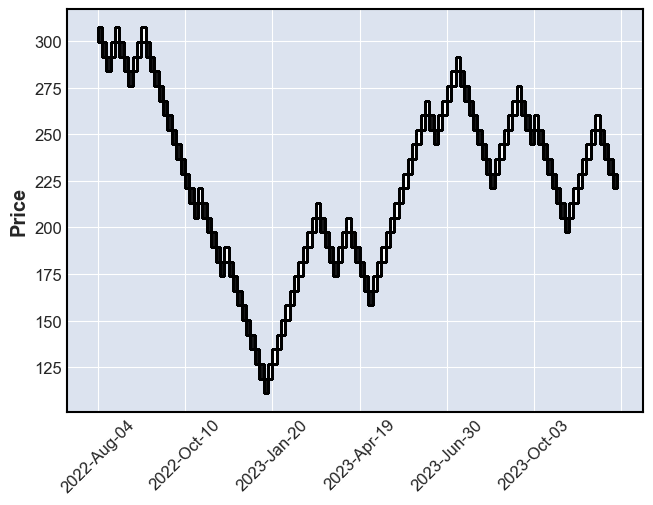

In [15]:
mpf.plot(price,type='renko')

##### 11. TESLA ONE YEAR MOVING AVERAGE

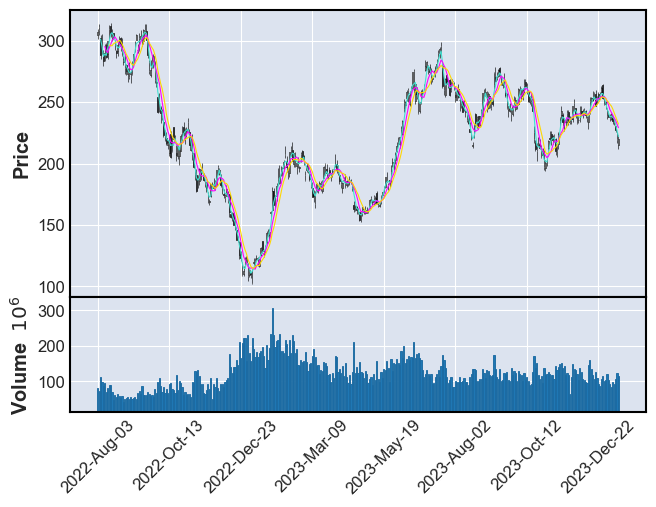

In [16]:
mpf.plot(price,type='candle',mav=(3,6,9),volume=True)

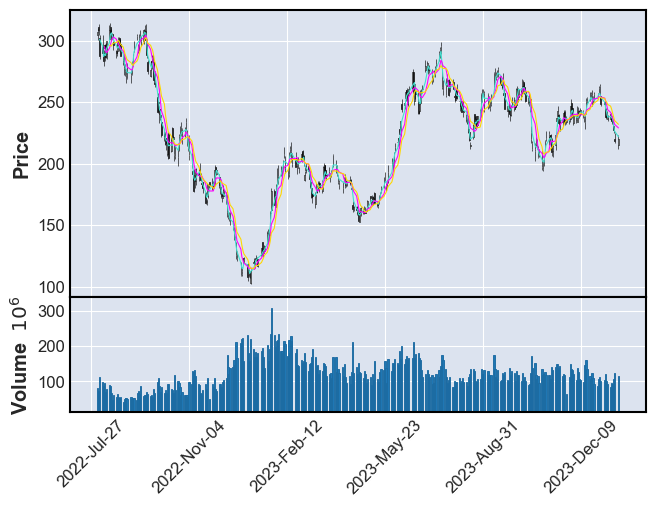

In [17]:
mpf.plot(price,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

##### 12. POINT AND FIGURE (PNF)

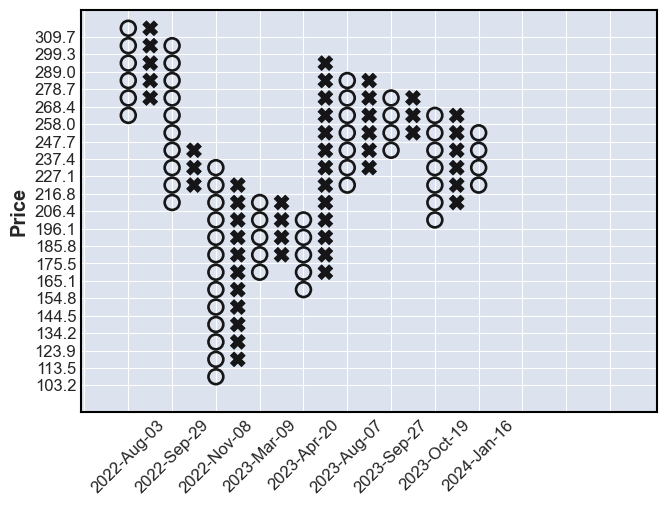

In [18]:
mpf.plot(price,type='pnf')

#### 13. BAR CHART WITH MOVING AVERAGES

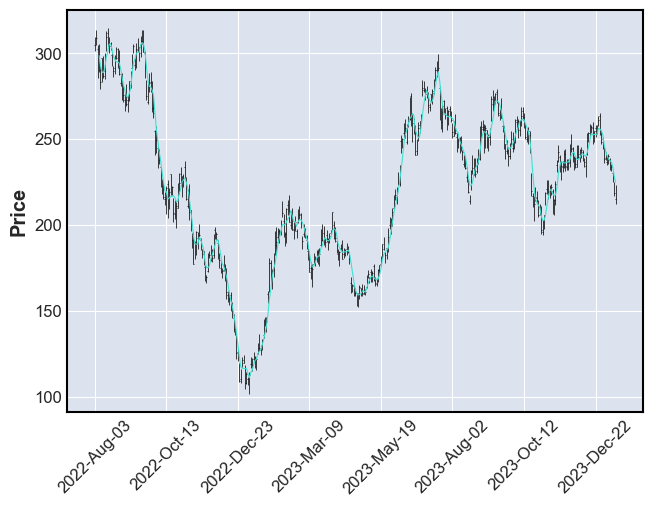

In [19]:
mpf.plot(price,type='ohlc',mav=4)

##### 14. CANDLE CHART WITH MOVING AVERAGES

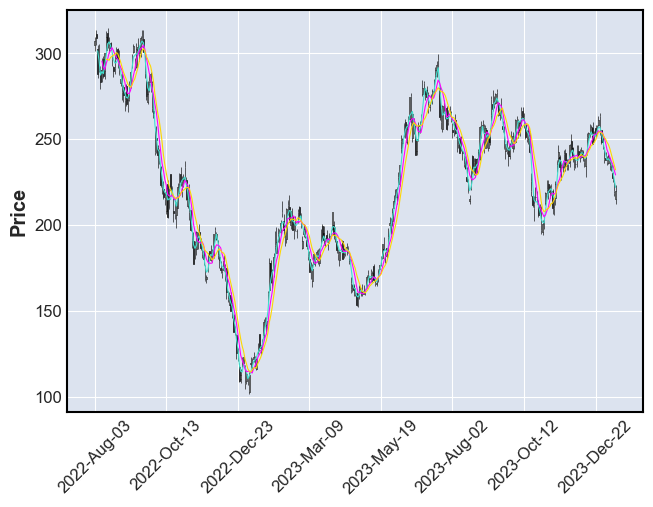

In [20]:
mpf.plot(price,type='candle',mav=(3,6,9))

##### 15. INTRA TRADING 15 MIN CHART

In [21]:
def get_stock_data(symbol, interval, period):
    stock = yf.Ticker(symbol)
    data = stock.history(interval=interval, period=period)
    data = data.reset_index()
    data.columns = data.columns.str.lower()
    return data

symbol = "TSLA"
interval = "15m"
period = "2d"
tesla = get_stock_data(symbol, interval, period)

In [22]:
tesla = StockData(tesla).add_day_time()

In [23]:
tesla[:10]

,open,high,low,close,volume,dividends,stock splits,day,date,hour,time,time_str,day_time
0,215.000000,215.419998,212.179993,214.169998,13338248,0.0,0.0,16,2024-01-16,9,09:30:00,09:30:00,2024-01-16 09:30:00
1,214.169998,218.850006,212.690002,218.690002,9914271,0.0,0.0,16,2024-01-16,9,09:45:00,09:45:00,2024-01-16 09:45:00
2,218.690002,222.270004,218.410004,222.050003,11318895,0.0,0.0,16,2024-01-16,10,10:00:00,10:00:00,2024-01-16 10:00:00
3,222.046906,223.490005,221.529999,222.960007,7953212,0.0,0.0,16,2024-01-16,10,10:15:00,10:15:00,2024-01-16 10:15:00
4,222.960007,223.440002,221.100006,221.906998,6718327,0.0,0.0,16,2024-01-16,10,10:30:00,10:30:00,2024-01-16 10:30:00
5,221.919907,222.494003,220.929993,221.101395,5169834,0.0,0.0,16,2024-01-16,10,10:45:00,10:45:00,2024-01-16 10:45:00
6,221.119995,221.395905,219.750000,220.684998,5485747,0.0,0.0,16,2024-01-16,11,11:00:00,11:00:00,2024-01-16 11:00:00
7,220.690002,221.990005,220.399994,221.426193,3619907,0.0,0.0,16,2024-01-16,11,11:15:00,11:15:00,2024-01-16 11:15:00
8,221.449997,222.000000,220.600006,220.774994,3168616,0.0,0.0,16,2024-01-16,11,11:30:00,11:30:00,2024-01-16 11:30:00
9,220.759995,220.779999,219.270004,219.610001,3565697,0.0,0.0,16,2024-01-16,11,11:45:00,11:45:00,2024-01-16 11:45:00


##### TESLA

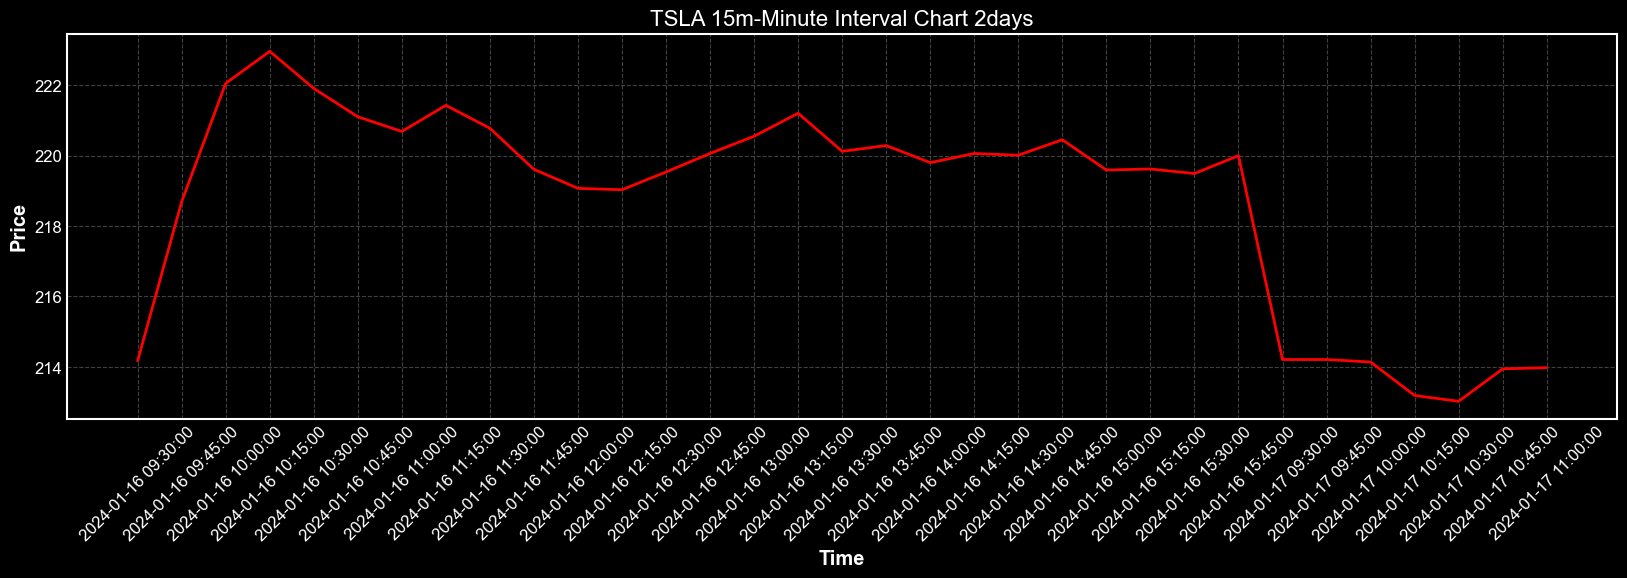

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(20,5))
plt.plot(tesla.day_time, tesla['close'], color="red")
plt.title(f'{symbol} {interval}-Minute Interval Chart {period}ays', fontsize=16)
plt.xticks(rotation=45)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

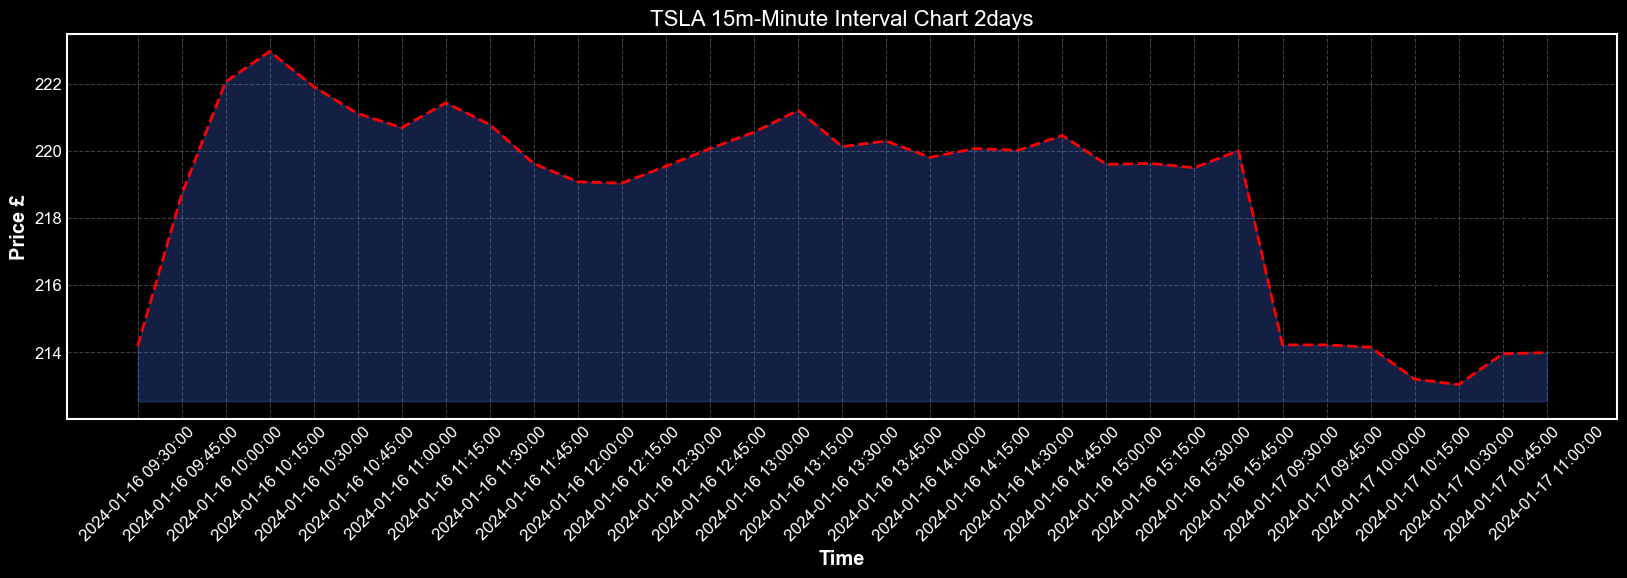

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(tesla.day_time, tesla['close'], color='red', linestyle="--")
y_bottom, y_top = ax.get_ylim()
ax.fill_between(tesla.day_time, tesla['close'], y_bottom, color='royalblue', alpha=0.3)
ax.set_title(f'{symbol} {interval}-Minute Interval Chart {period}ays', fontsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('Price £')
ax.xaxis.set_tick_params(rotation=45)
plt.show()

##### 16. AMAZON

In [26]:
symbol = "AMZN"
interval = "15m"
period = "2d"
amazon= get_stock_data(symbol, interval, period)

In [27]:
amazon = StockData(amazon).add_day_time()

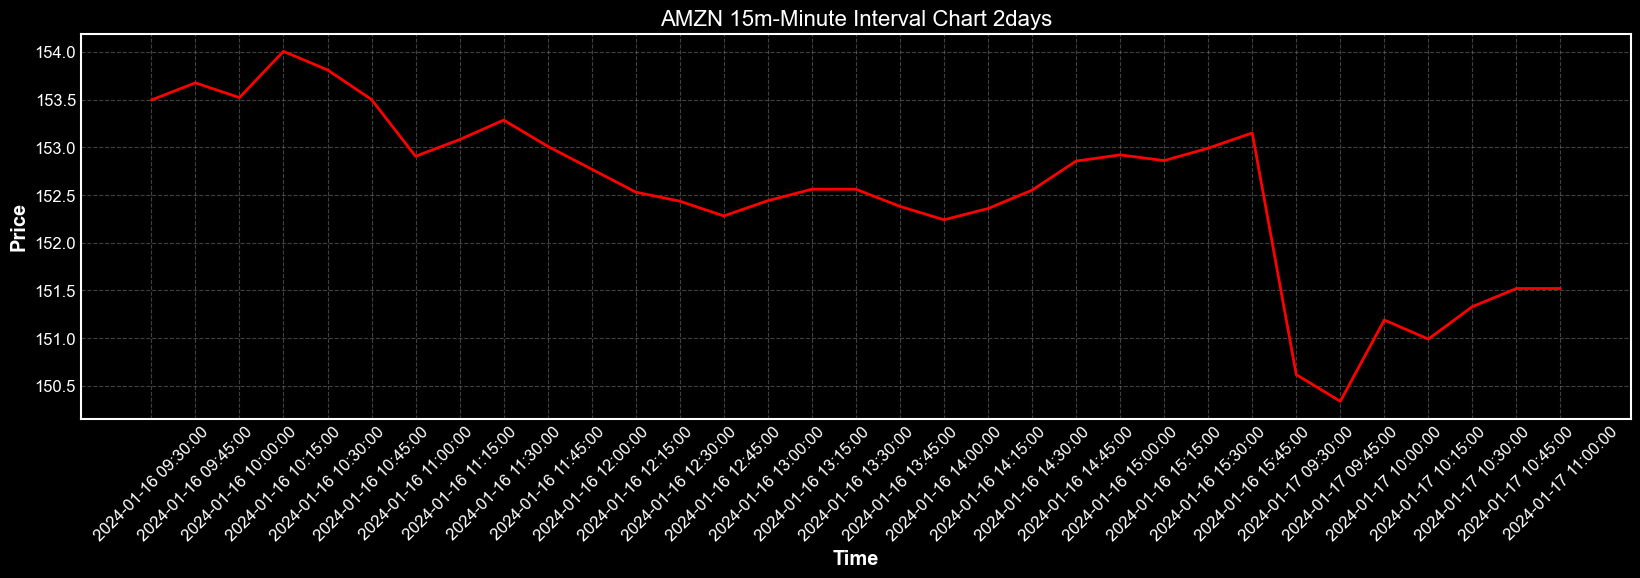

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(20,5))
plt.plot(amazon.day_time, amazon['close'], color="red")
plt.title(f'{symbol} {interval}-Minute Interval Chart {period}ays', fontsize=16)
plt.xticks(rotation=45)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

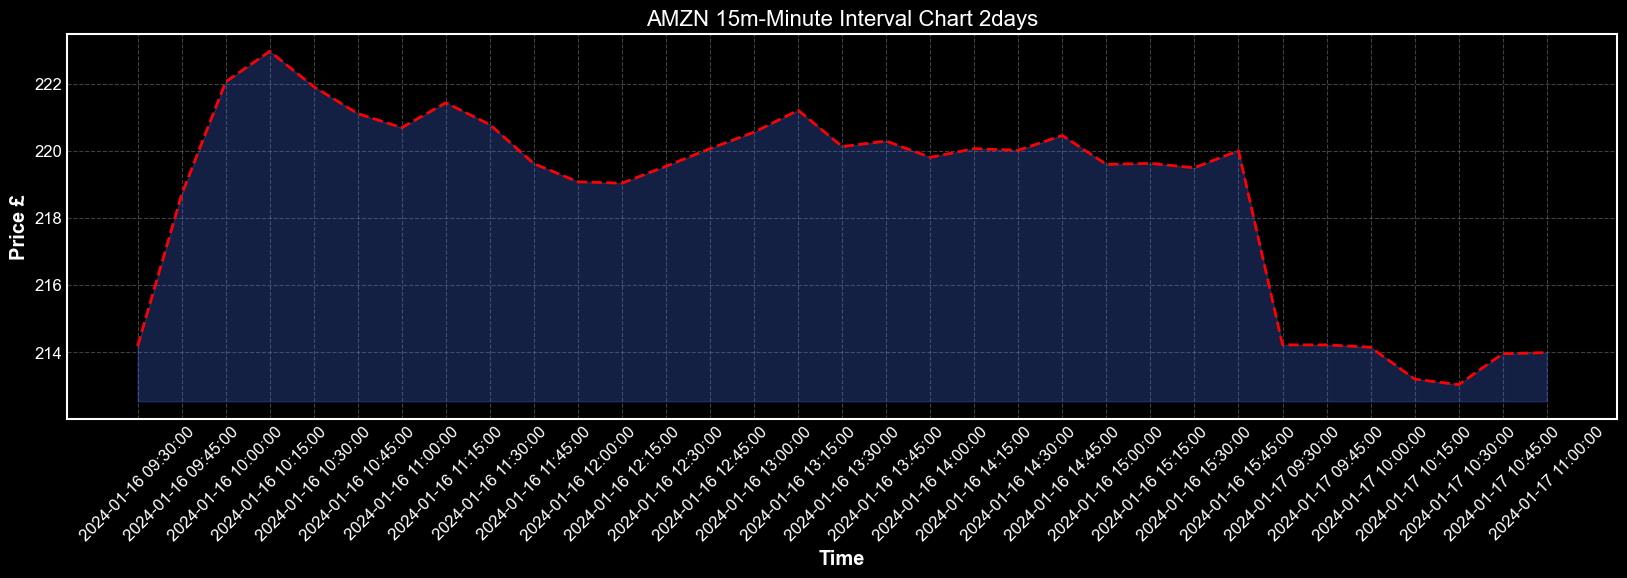

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(tesla.day_time, tesla['close'], color='red', linestyle="--")
y_bottom, y_top = ax.get_ylim()
ax.fill_between(tesla.day_time, tesla['close'], y_bottom, color='royalblue', alpha=0.3)
ax.set_title(f'{symbol} {interval}-Minute Interval Chart {period}ays', fontsize=16)
plt.grid(linestyle='--', color='gray', alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('Price £')
ax.xaxis.set_tick_params(rotation=45)
plt.show()

##### 17. TESLA VS AMAZON

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler

StandardScaler()

In [32]:
tesla_scaled = scaler.fit_transform(tesla[['open', 'high', 'low', 'close']])

In [33]:
tesla_scaled_df = pd.DataFrame(tesla_scaled, columns=['open', 'high', 'low', 'close'])
tesla_scaled_df[['day_time', 'volume']] = tesla[['day_time', 'volume']]
tesla_scaled_df.head()

,open,high,low,close,day_time,volume
0,-1.238830,-1.403405,-1.804469,-1.575154,2024-01-16 09:30:00,13338248
1,-1.521606,-0.198802,-1.642588,-0.022622,2024-01-16 09:45:00,9914271
2,0.018331,1.002285,0.172983,1.131472,2024-01-16 10:00:00,11318895
3,1.162006,1.430744,1.163292,1.444041,2024-01-16 10:15:00,7953212
4,1.473094,1.413183,1.026809,1.082353,2024-01-16 10:30:00,6718327


In [34]:
amazon_scaled = scaler.fit_transform(amazon[['open', 'high', 'low', 'close']])

In [35]:
amazon_scaled_df = pd.DataFrame(amazon_scaled, columns=['open', 'high', 'low', 'close'])
amazon_scaled_df[['day_time', 'volume']] = amazon[['day_time', 'volume']]
amazon_scaled_df.head()

,open,high,low,close,day_time,volume
0,0.918508,2.286942,1.150522,1.069496,2024-01-16 09:30:00,4665753
1,1.050638,1.000200,0.966389,1.270125,2024-01-16 09:45:00,1777541
2,1.243339,0.910191,0.650735,1.097370,2024-01-16 10:00:00,1993257
3,1.089182,1.635628,1.282044,1.637931,2024-01-16 10:15:00,2008115
4,1.639746,1.407939,1.408299,1.420584,2024-01-16 10:30:00,1134073


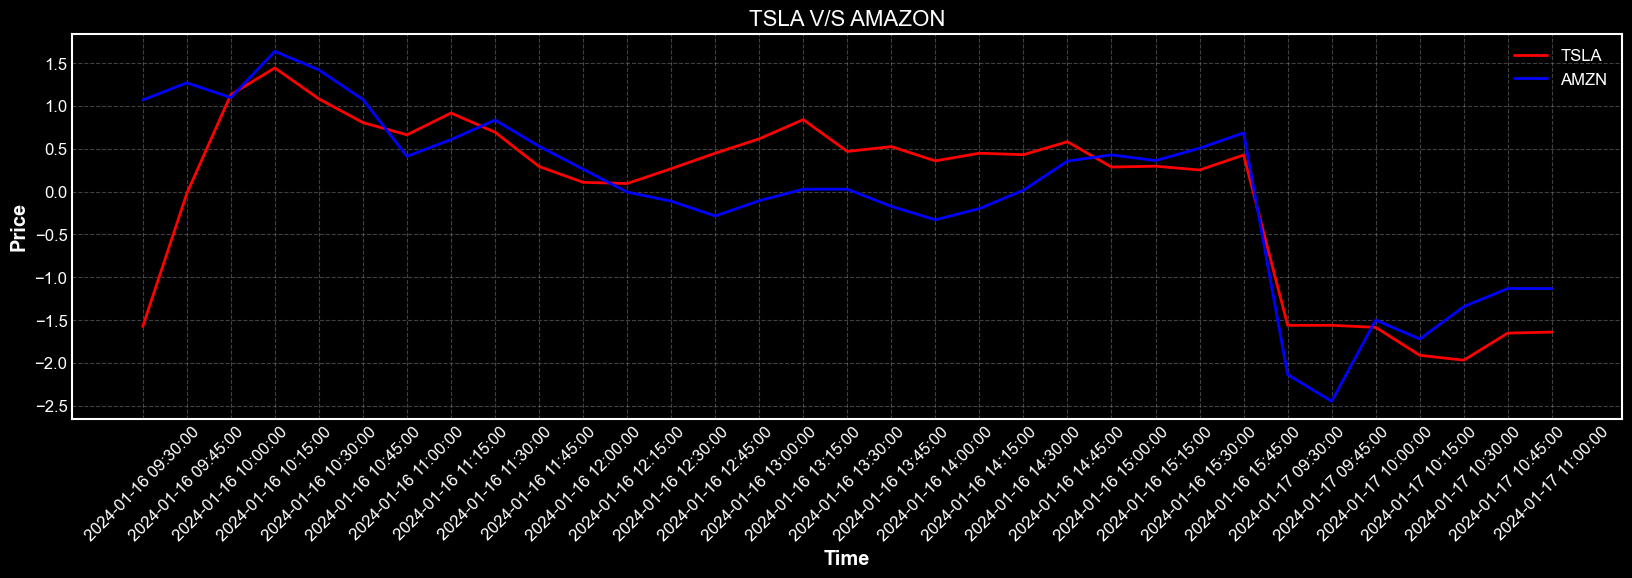

In [36]:
plt.style.use('dark_background')
plt.figure(figsize=(20,5))
plt.plot(tesla.day_time, tesla_scaled_df['close'], color="red", label="TSLA")
plt.plot(amazon.day_time, amazon_scaled_df['close'], color="blue", label="AMZN")
plt.title("TSLA V/S AMAZON", fontsize=16)
plt.xticks(rotation=45)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


##### 18. INTRA TRADING TESLA 1MIN INTERVAL AND 1 MIN CHART

In [37]:
symbol = "TSLA"
interval = "1m"
period = "1d"
tesla = get_stock_data(symbol, interval, period)
tesla = StockData(tesla).add_day_time()

In [38]:
tesla.index = pd.to_datetime(tesla.day_time)
tesla[:10]

,open,high,low,close,volume,dividends,stock splits,day,date,hour,time,time_str,day_time
day_time,,,,,,,,,,,,,
2024-01-17 09:30:00,214.860001,215.380005,213.979996,214.134995,4110346,0.0,0.0,17,2024-01-17,9,09:30:00,09:30:00,2024-01-17 09:30:00
2024-01-17 09:31:00,213.940002,214.879898,213.669998,214.729904,807336,0.0,0.0,17,2024-01-17,9,09:31:00,09:31:00,2024-01-17 09:31:00
2024-01-17 09:32:00,214.752106,214.869995,214.050095,214.684998,616544,0.0,0.0,17,2024-01-17,9,09:32:00,09:32:00,2024-01-17 09:32:00
2024-01-17 09:33:00,214.690002,214.970001,213.770004,213.919998,769371,0.0,0.0,17,2024-01-17,9,09:33:00,09:33:00,2024-01-17 09:33:00
2024-01-17 09:34:00,213.880005,214.070007,212.649994,212.660004,1137459,0.0,0.0,17,2024-01-17,9,09:34:00,09:34:00,2024-01-17 09:34:00
2024-01-17 09:35:00,212.690002,213.160004,212.410095,212.470001,981055,0.0,0.0,17,2024-01-17,9,09:35:00,09:35:00,2024-01-17 09:35:00
2024-01-17 09:36:00,212.472000,213.210007,212.345001,212.994995,847426,0.0,0.0,17,2024-01-17,9,09:36:00,09:36:00,2024-01-17 09:36:00
2024-01-17 09:37:00,213.020004,214.070007,212.729996,213.955002,851390,0.0,0.0,17,2024-01-17,9,09:37:00,09:37:00,2024-01-17 09:37:00
2024-01-17 09:38:00,213.949997,214.548706,213.850006,214.100006,700436,0.0,0.0,17,2024-01-17,9,09:38:00,09:38:00,2024-01-17 09:38:00


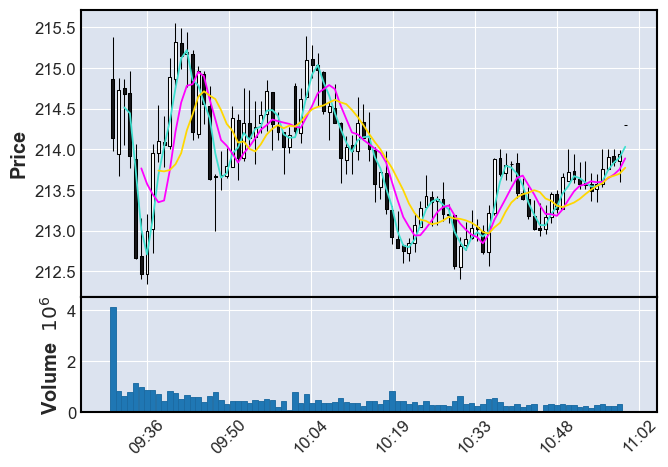

In [39]:
mpf.plot(tesla,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

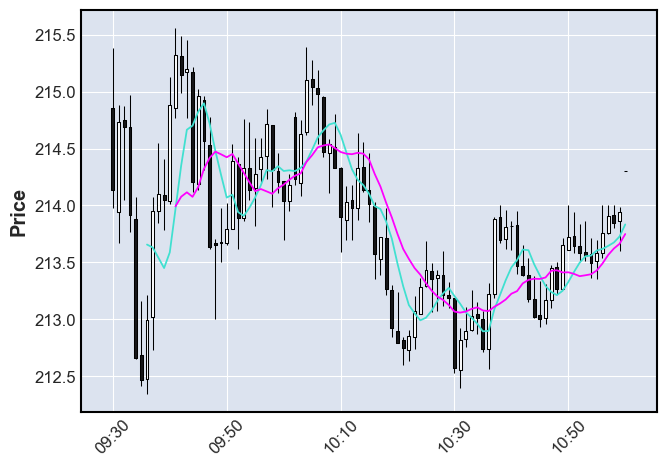

In [40]:
mpf.plot(tesla,type='candle',mav=(7,12))

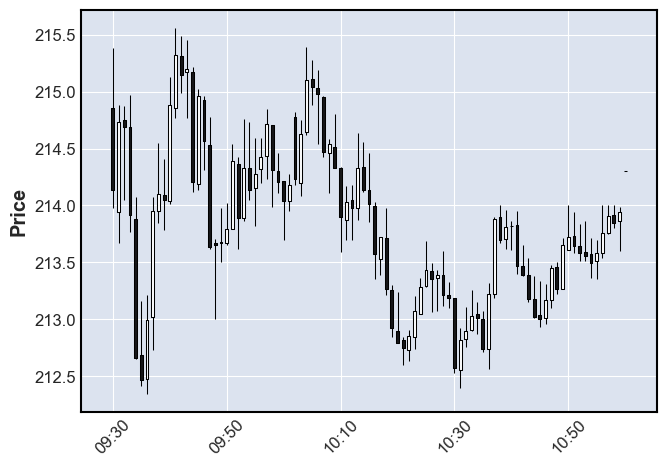

In [41]:
mpf.plot(tesla,type='candle')

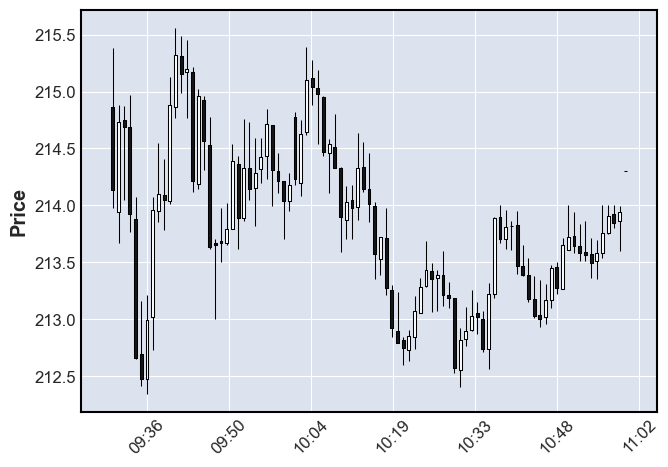

In [42]:
mpf.plot(tesla,type='candle',show_nontrading=True)

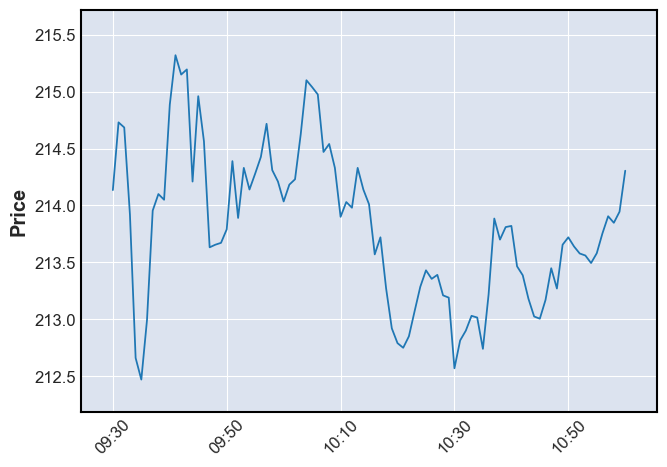

In [43]:
mpf.plot(tesla,type='line') 

##### 19. INTRA TRADING AMAZON 1MIN CHART

In [44]:
symbol = "AMZN"
interval = "1m"
period = "1d"
amazon= get_stock_data(symbol, interval, period)
amazon = StockData(amazon).add_day_time()

In [45]:
amazon.index = pd.to_datetime(amazon.day_time)
amazon[:5]

,open,high,low,close,volume,dividends,stock splits,day,date,hour,time,time_str,day_time
day_time,,,,,,,,,,,,,
2024-01-17 09:30:00,151.490005,152.000000,151.429993,151.529999,1283115,0.0,0.0,17,2024-01-17,9,09:30:00,09:30:00,2024-01-17 09:30:00
2024-01-17 09:31:00,151.449997,151.620605,150.880005,151.115005,289610,0.0,0.0,17,2024-01-17,9,09:31:00,09:31:00,2024-01-17 09:31:00
2024-01-17 09:32:00,151.119995,151.134995,150.720993,150.789993,202398,0.0,0.0,17,2024-01-17,9,09:32:00,09:32:00,2024-01-17 09:32:00
2024-01-17 09:33:00,150.779999,151.139099,150.759995,151.039993,167144,0.0,0.0,17,2024-01-17,9,09:33:00,09:33:00,2024-01-17 09:33:00
2024-01-17 09:34:00,151.044998,151.095001,150.839996,150.960007,177916,0.0,0.0,17,2024-01-17,9,09:34:00,09:34:00,2024-01-17 09:34:00


In [46]:
amazon.size

1183

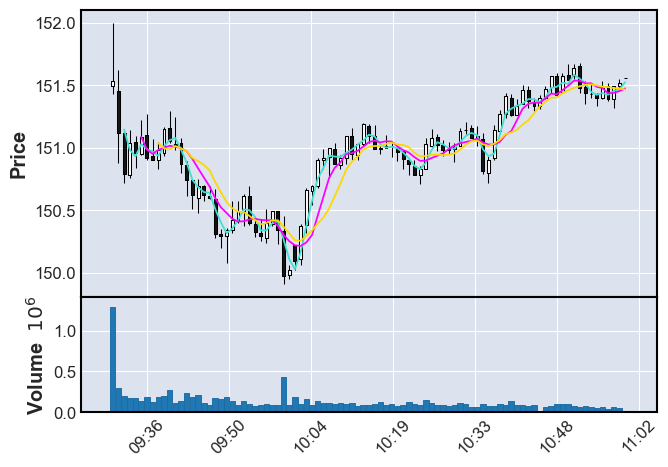

In [47]:
mpf.plot(amazon,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

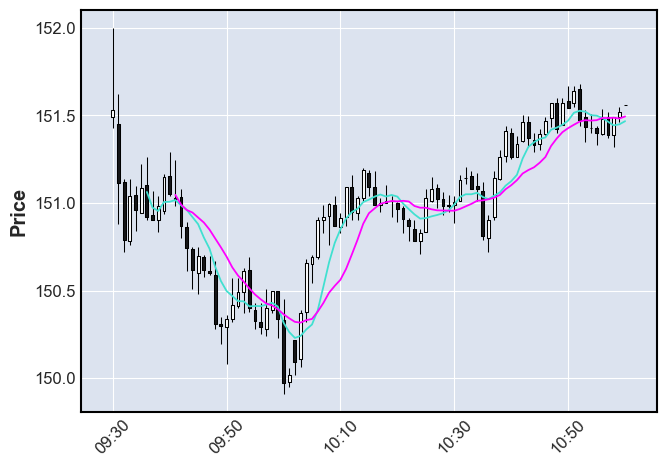

In [48]:
mpf.plot(amazon,type='candle',mav=(7,12))

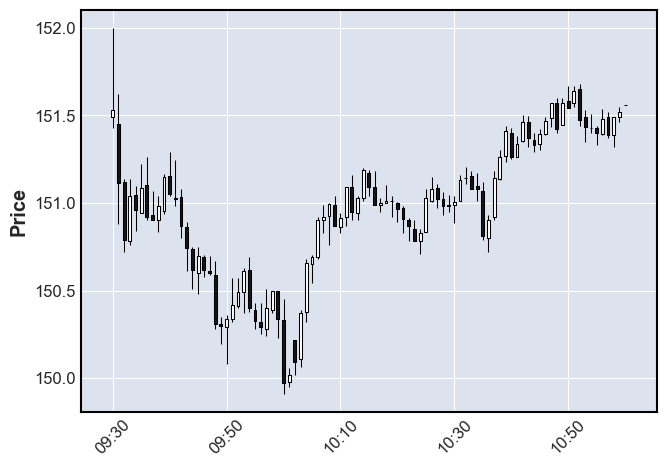

In [49]:
mpf.plot(amazon,type='candle')

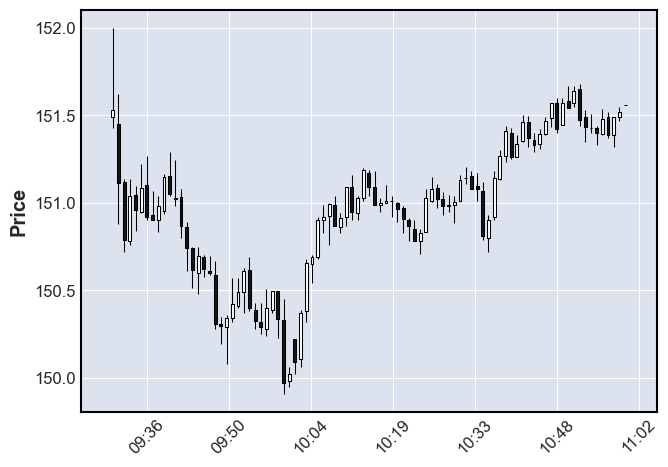

In [50]:
mpf.plot(amazon,type='candle',show_nontrading=True)

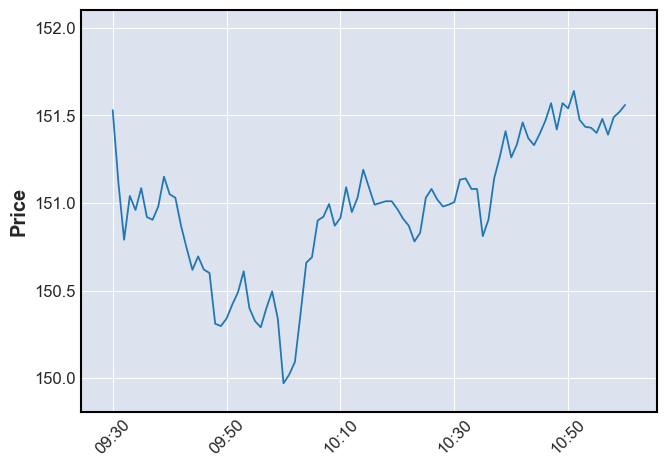

In [51]:
mpf.plot(amazon,type='line') 